# Example for computing a price serie's spectrogram

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 5)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

from utils import *

# Data 

In [3]:
api_key = open(file='quandl_api').read().replace('\n', '')
quandl.ApiConfig.api_key = api_key

In [4]:
prices_dict = get_quandl_edi(list(QUANDL_FREE_SAMPLES_EDI.keys()))
print(len(prices_dict))
print(list(prices_dict.keys()))

191
['XNAS/AAXJ', 'XNAS/AAON', 'XNAS/ABAX', 'XNAS/ABM', 'XNAS/ACET', 'XNAS/ACNB', 'XNAS/AAPL', 'XNAS/AAME', 'XNAS/ACLS', 'XNAS/AAL', 'XNAS/ABCO', 'XNAS/ABG', 'XNAS/ABAC', 'XNAS/ACIW', 'XBOM/500003', 'XBOM/500008', 'XBOM/500012', 'XBOM/500013', 'XBOM/500002', 'XBOM/500023', 'XBOM/500024', 'XBOM/500027', 'XBOM/500031', 'XBOM/500032', 'XBOM/500038', 'XBOM/500039', 'XBOM/500020', 'XBOM/500040', 'XBOM/500010', 'XTSE/AND', 'XTSE/AFN', 'XTSE/AGT', 'XTSE/ACQ', 'XTSE/ALA', 'XTSE/AIF', 'XTSE/ALB', 'XTSE/ALO', 'XTSE/ABT', 'XTSE/ACD', 'XTSE/AEM', 'XTSE/AGU', 'XTSE/ALC', 'XTSE/ABX', 'XTSE/AAB', 'XSHG/600020', 'XSHG/600015', 'XSHG/600021', 'XSHG/600019', 'XSHG/600009', 'XSHG/600016', 'XSHG/600007', 'XSHG/600000', 'XSHG/600006', 'XSHG/600017', 'XSHG/600011', 'XSHG/600010', 'XSHG/600026', 'XSHG/600012', 'XSHG/600004', 'XLON/ADM', 'XLON/ABC', 'XLON/AFS', 'XLON/AAIF', 'XLON/ADT', 'XLON/AEFS', 'XLON/AAS', 'XLON/AFN', 'XLON/AGK', 'XLON/AAL', 'XLON/AEP', 'XLON/ABF', 'XLON/ADIG', 'XLON/ABBY', 'XLON/AEO', 'X

j: 164  -  XSHE/200055


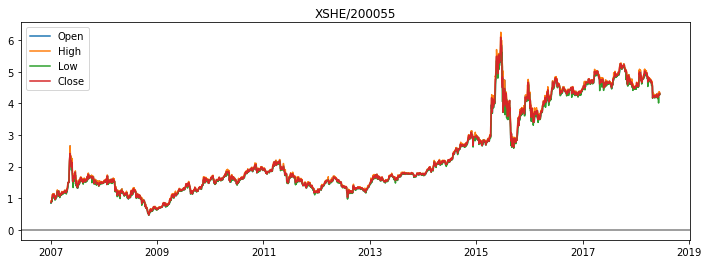

In [49]:
j = np.random.choice(len(prices_dict) - 1)
ticker_j = list(prices_dict.keys())[j]
print('j:', j, ' - ', ticker_j)
# prices_dict[ticker_j][['Open', 'High', 'Low', 'Close']].plot()
plot_prices(prices_dict[ticker_j], name=ticker_j)

# Spectrogram

In [50]:
from scipy import signal

In [51]:
price = prices_dict[ticker_j]
price

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-04,0.850798,0.919459,0.850798,0.868709,9671.409000
2007-01-05,0.868709,0.898562,0.853783,0.889606,6062.109075
...,...,...,...,...,...
2018-06-12,4.300000,4.350000,4.300000,4.320000,418220.000000
2018-06-13,4.310000,4.320000,4.280000,4.280000,390780.000000


In [52]:
price.groupby(price.index.year).count()

,Open,High,Low,Close,Volume
Date,,,,,
2007,258,258,258,258,258
2008,262,262,262,262,262
...,...,...,...,...,...
2017,260,260,260,260,260
2018,118,118,118,118,118


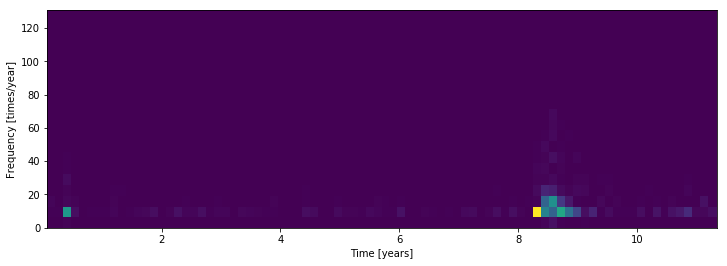

In [58]:
f, t, Sxx = signal.spectrogram(x=price.Close.values, fs=261, nperseg=40, 
                               window=('tukey', 0.25), detrend='constant')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [times/year]')
plt.xlabel('Time [years]')
plt.show()

In [61]:
t.shape

(85,)

In [60]:
f.shape

(21,)

In [59]:
Sxx.shape

(21, 85)

In [23]:
len(price) / 261

4.590038314176245